In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score

In [45]:
df_train=pd.read_csv('./cs-training.csv')

In [46]:
#去掉第一列
df_train=df_train.iloc[:,1:]

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

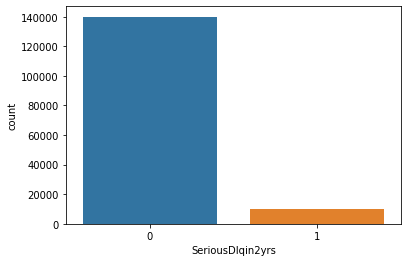

0.06684

In [48]:
#f进行的数据可视化
sns.countplot(x='SeriousDlqin2yrs',data=df_train)
plt.show()
#违约比例
df_train['SeriousDlqin2yrs'].value_counts()[1]/len(df_train)

In [49]:
#缺失值比例
df_train.isnull().sum()/len(df_train)

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

In [50]:
df_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines'>

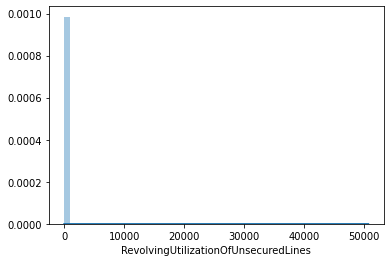

In [51]:
#直方图分布
sns.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])

<AxesSubplot:xlabel='NumberOfTimes90DaysLate'>

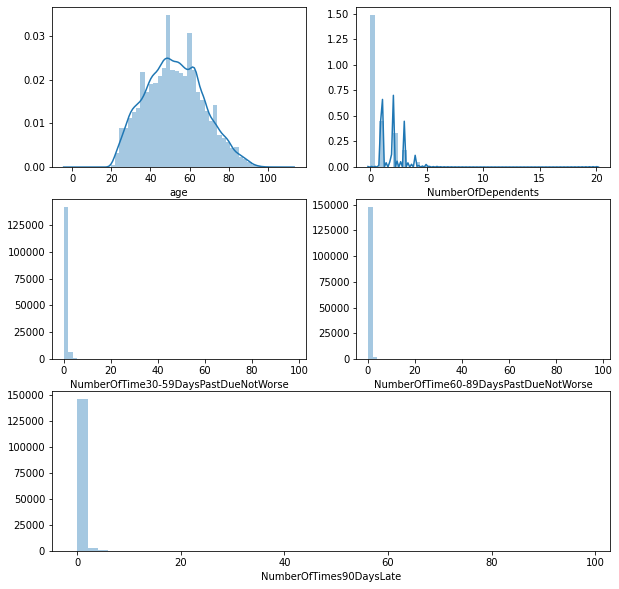

In [52]:
#对不同的特征进行分布可视化,作为 分箱参考
p=plt.figure(figsize=(10,10))
p.add_subplot(321)
sns.distplot(df_train['age'])
p.add_subplot(322)
sns.distplot(df_train['NumberOfDependents'])
p.add_subplot(323)
sns.distplot(df_train['NumberOfTime30-59DaysPastDueNotWorse'],kde=False)
p.add_subplot(324)
sns.distplot(df_train['NumberOfTime60-89DaysPastDueNotWorse'],kde=False)
p.add_subplot(313)
sns.distplot(df_train['NumberOfTimes90DaysLate'],kde=False)

# 数据分箱处理

In [86]:
#对age字段进行分箱
age_bins=[-math.inf,25,40,50,60,70,math.inf]
df_train['bin_age']=pd.cut(df_train['age'],bins=age_bins).astype(str)
#对字段进行分箱处理
dependent_bin=[-math.inf,2,4,math.inf]
df_train['bin_numdependence']=pd.cut(df_train['NumberOfDependents'],bins=dependent_bin).astype(str)
pdnwbins=[-math.inf,1,2,3,4,6,math.inf]
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse']=pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'],bins=pdnwbins)
pdnwbins1=[-math.inf,1,2,5,math.inf]
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse']=pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'],bins=pdnwbins1)
pdnwbins1=[-math.inf,1,2,5,math.inf]
df_train['bin_NumberOfTimes90DaysLate']=pd.cut(df_train['NumberOfTimes90DaysLate'],bins=pdnwbins1)

In [87]:
#查看分箱后的数据
print(df_train['bin_age'].value_counts())
print(df_train['bin_numdependence'].value_counts())
print(df_train['bin_NumberOfTime30-59DaysPastDueNotWorse'].value_counts())
print(df_train['bin_NumberOfTime60-89DaysPastDueNotWorse'].value_counts())
print(df_train['bin_NumberOfTimes90DaysLate'].value_counts())

(40.0, 50.0]    35037
(50.0, 60.0]    34806
(25.0, 40.0]    32069
(60.0, 70.0]    27424
(70.0, inf]     17636
(-inf, 25.0]     3028
Name: bin_age, dtype: int64
(-inf, 2.0]    132740
(2.0, 4.0]      12345
nan              3924
(4.0, inf]        991
Name: bin_numdependence, dtype: int64
(-inf, 1.0]    142051
(1.0, 2.0]       4598
(2.0, 3.0]       1754
(3.0, 4.0]        747
(4.0, 6.0]        482
(6.0, inf]        368
Name: bin_NumberOfTime30-59DaysPastDueNotWorse, dtype: int64
(-inf, 1.0]    148127
(1.0, 2.0]       1118
(2.0, 5.0]        457
(5.0, inf]        298
Name: bin_NumberOfTime60-89DaysPastDueNotWorse, dtype: int64
(-inf, 1.0]    146905
(1.0, 2.0]       1555
(2.0, 5.0]       1089
(5.0, inf]        451
Name: bin_NumberOfTimes90DaysLate, dtype: int64


In [88]:
#对其他的字段进行等频划分
df_train['bin_RevolvingUtilizationOfUnsecuredLines']=pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'],q=5,duplicates='drop')
df_train['bin_DebtRatio']=pd.qcut(df_train['DebtRatio'],q=5,duplicates='drop')
df_train['bin_MonthlyIncome']=pd.qcut(df_train['MonthlyIncome'],q=5,duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans']=pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'],q=5,duplicates='drop')
df_train['bin_NumberRealEstateLoansOrLines']=pd.qcut(df_train['NumberRealEstateLoansOrLines'],q=5,duplicates='drop')

In [89]:
#统计风险字段
bin_cols=[x for x in df_train.columns.values if x.startswith('bin_')]

In [90]:
#使用ivj进行变量能力的预测
def cal_iv(df,feature,target):
    lst=[]
    cols=['variable','value','all','bad']
    for i in range(df[feature].nunique()):
        val=list(df[feature].unique())[i]
        lst.append([feature,val,df[df[feature]==val].count()[feature],\
                   df[(df[feature]==val)&(df[target]==1)].count()[feature]])
#         print(feature,val,df[df[feature]==val].count()[feature],\
#              df[(df[feature]==val)&(df[target]==1)].count()[feature])
        data=pd.DataFrame(lst,columns=cols)
        data=data[data['bad']>0]
        data['share']=data['all']/data['all'].sum()
        data['bad_rate']=data['bad']/data['all']
        data['distribution_good']=(data['all']-data['bad'])/(data['all'].sum()-data['bad'].sum())
        data['distribution_bad']=data['bad']/data['bad'].sum()
        data['woe']=np.log1p(data['distribution_bad']/data['distribution_good'])
        data['iv']=(data['distribution_bad']-data['distribution_good'])*data['woe']
        data=data.sort_values(by=['variable','value'],ascending=True)
        
    return data['iv'].sum()

In [91]:
#计算出所有的数据
for feature in bin_cols:
    print(feature,cal_iv(df_train,feature,'SeriousDlqin2yrs'))

bin_age 0.10630739209281985
bin_numdependence 0.009088785155063478
bin_NumberOfTime30-59DaysPastDueNotWorse 0.3396671947242962
bin_NumberOfTime60-89DaysPastDueNotWorse 0.20265329915188812
bin_NumberOfTimes90DaysLate 0.37146948683752234
bin_RevolvingUtilizationOfUnsecuredLines 0.5271795713507914
bin_DebtRatio 0.03172027187994232
bin_MonthlyIncome 0.046411253099715666
bin_NumberOfOpenCreditLinesAndLoans 0.02500753746836124
bin_NumberRealEstateLoansOrLines 0.006035388120960453


In [92]:
cols=[]
for feature in bin_cols:
    if cal_iv(df_train,feature,'SeriousDlqin2yrs')>0.1:
        cols.append(feature)

In [93]:
cols

['bin_age',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines']

In [94]:
#计算字段的woe值
def cal_woe(df,feature,target):
    for f in feature:
        df_woe=df.groupby(f).agg({target:['sum','count']})
        df_woe.columns=list(map(''.join,df_woe.columns.values))
        df_woe=df_woe.reset_index()
        df_woe=df_woe.rename(columns={target+'sum':'bad',target+'count':'all'})
        df_woe['good']=df_woe['all']-df_woe['bad']
        df_woe['bad_rate']=df_woe['bad']/df_woe['bad'].sum()
        df_woe['good_rate']=df_woe['good']/df_woe['good'].sum()
        df_woe['woe']=np.log1p(df_woe['bad_rate']/df_woe['good_rate'])
        df_woe.columns=[x if x==f else x+'_'+f for x in list(df_woe.columns.values)]
        df=df.merge(df_woe,on=f,how='left')
    return df

In [95]:
df_woe=cal_woe(df_train,cols,'SeriousDlqin2yrs')

In [96]:
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberOfTimes90DaysLate,bad_rate_bin_NumberOfTimes90DaysLate,good_rate_bin_NumberOfTimes90DaysLate,woe_bin_NumberOfTimes90DaysLate,bad_bin_RevolvingUtilizationOfUnsecuredLines,all_bin_RevolvingUtilizationOfUnsecuredLines,good_bin_RevolvingUtilizationOfUnsecuredLines,bad_rate_bin_RevolvingUtilizationOfUnsecuredLines,good_rate_bin_RevolvingUtilizationOfUnsecuredLines,woe_bin_RevolvingUtilizationOfUnsecuredLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,138586,0.829743,0.990084,0.608707,5963,30000,24037,0.594754,0.171725,1.495914
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,138586,0.829743,0.990084,0.608707,5963,30000,24037,0.594754,0.171725,1.495914
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,138586,0.829743,0.990084,0.608707,2107,30000,27893,0.210154,0.199273,0.720083
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,138586,0.829743,0.990084,0.608707,877,30000,29123,0.087473,0.208060,0.350952
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,138586,0.829743,0.990084,0.608707,5963,30000,24037,0.594754,0.171725,1.495914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,138586,0.829743,0.990084,0.608707,497,30000,29503,0.049571,0.210775,0.211221
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,138586,0.829743,0.990084,0.608707,2107,30000,27893,0.210154,0.199273,0.720083
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,...,138586,0.829743,0.990084,0.608707,877,30000,29123,0.087473,0.208060,0.350952
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,138586,0.829743,0.990084,0.608707,582,30000,29418,0.058049,0.210168,0.243890


In [97]:
woe_cols=[x for x in list(df_woe.columns.values) if 'woe' in x]
df_woe[woe_cols].describe()

,woe_bin_age,woe_bin_NumberOfTime30-59DaysPastDueNotWorse,woe_bin_NumberOfTime60-89DaysPastDueNotWorse,woe_bin_NumberOfTimes90DaysLate,woe_bin_RevolvingUtilizationOfUnsecuredLines
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.673209,0.649775,0.672504,0.656051,0.604412
std,0.235092,0.334334,0.241937,0.327481,0.481036
min,0.279404,0.572521,0.645352,0.608707,0.211221
25%,0.406848,0.572521,0.645352,0.608707,0.243890
50%,0.651655,0.572521,0.645352,0.608707,0.350952
75%,0.813822,0.572521,0.645352,0.608707,0.720083
max,1.013134,2.797104,3.017651,3.123606,1.495914


In [98]:
#统计woe规则
feature_cols=['age','NumberOfTime30-59DaysPastDueNotWorse',\
              'NumberOfTime60-89DaysPastDueNotWorse',\
              'NumberOfTimes90DaysLate','RevolvingUtilizationOfUnsecuredLines']
df_bin_to_woe=pd.DataFrame(columns=['feature','bin','woe'])
for feature in feature_cols:
    b='bin_'+feature 
    w='woe_bin_'+feature
    df=df_woe[[w,b]].drop_duplicates()
    df.columns=['woe','bin']
    df['feature']=feature
    df=df[['feature','bin','woe']]
    df_bin_to_woe=pd.concat([df_bin_to_woe,df])
df_bin_to_woe

,feature,bin,woe
0,age,"(40.0, 50.0]",0.813822
1,age,"(25.0, 40.0]",0.955231
5,age,"(70.0, inf]",0.279404
6,age,"(50.0, 60.0]",0.651655
15,age,"(60.0, 70.0]",0.406848
19,age,"(-inf, 25.0]",1.013134
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111


# 进行逻辑回归建模

In [99]:
#进行数据切分
x=df_woe[woe_cols]
y=df_woe['SeriousDlqin2yrs']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=000)
model=LogisticRegression()
#使用K折交叉验证
print(cross_val_score(model,x_train,y_train,scoring='accuracy',cv=5))
print(cross_val_score(model,x_train,y_train,scoring='roc_auc',cv=5))
#进行模型拟合
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("模型准确率:{}".format(accuracy_score(y_pred,y_test)))
print("模型auc:{}".format(roc_auc_score(y_pred,y_test)))

[0.93675    0.93545833 0.93683333 0.93516667 0.93729167]
[0.8250638  0.81889627 0.81933591 0.81729789 0.82462202]
模型准确率:0.9357
模型auc:0.7917710751618332


# 评分卡模型转换

score=A-B*ln(odds)

B=PDO/Ln(2)

A=P+B*Ln(θ)



In [100]:

A=650
B=72.13
feature_cols=['age','NumberOfTime30-59DaysPastDueNotWorse',\
              'NumberOfTime60-89DaysPastDueNotWorse',\
              'NumberOfTimes90DaysLate','RevolvingUtilizationOfUnsecuredLines']
#分数，模型系数,B，woe特征相关
def generate_scorecard(model_coef,bining_df,features,B):
    lst =[]
    cols=['variable','bining','score']
    coef=model_coef[0]
    print(coef)
    for i in range(len(features)):
        f=features[i]
        df=bining_df[bining_df['feature']==f]
        for index,row in df.iterrows():
            lst.append([f,row['bin'],int(round(-coef[i]*row['woe']*B))])
    data=pd.DataFrame(lst,columns=cols)
    return data
score_card=generate_scorecard(model.coef_,df_bin_to_woe,feature_cols,B)
score_card

[1.07412367 0.87697074 0.42161976 0.73232649 1.45956976]


,variable,bining,score
0,age,"(40.0, 50.0]",-63
1,age,"(25.0, 40.0]",-74
2,age,"(70.0, inf]",-22
3,age,"(50.0, 60.0]",-50
4,age,"(60.0, 70.0]",-32
5,age,"(-inf, 25.0]",-78
6,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-114
7,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-36
8,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-136
9,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-154


In [101]:
#对每个字段进行的排序，查看规则
sort_scorecard=score_card.groupby('variable').apply(lambda x:x.sort_values('score',ascending=True))

In [102]:
sort_scorecard

variable  \
variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 11  NumberOfTime30-59DaysPastDueNotWorse   
                                     10  NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     6   NumberOfTime30-59DaysPastDueNotWorse   
                                     7   NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 14  NumberOfTime60-89DaysPastDueNotWorse   
                                     15  NumberOfTime60-89DaysPastDueNotWorse   
                                     13  NumberOfTime60-89DaysPastDueNotWorse   
                                     12  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              17               NumberOfTimes90DaysLate   
                                     19               NumberOfTimes90DaysLate   
                                     18               NumberOfTimes90DaysLate   
                                     16               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 20  RevolvingUtilizationOfUnsecuredLines   
                                     21  RevolvingUtilizationOfUnsecuredLines   
                                     22  RevolvingUtilizationOfUnsecuredLines   
                                     23  RevolvingUtilizationOfUnsecuredLines   
                                     24  RevolvingUtilizationOfUnsecuredLines   
age                                  5                                    age   
                                     1                                    age   
                                     0                                    age   
                                     3                                    age   
                                     4                                    age   
                                     2                                    age   

                                                   bining  score  
variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 11        (6.0, inf]   -177  
                                     10        (4.0, 6.0]   -165  
                                     9         (3.0, 4.0]   -154  
                                     8         (2.0, 3.0]   -136  
                                     6         (1.0, 2.0]   -114  
                                     7        (-inf, 1.0]    -36  
NumberOfTime60-89DaysPastDueNotWorse 14        (2.0, 5.0]    -92  
                                     15        (5.0, inf]    -89  
                                     13        (1.0, 2.0]    -82  
                                     12       (-inf, 1.0]    -20  
NumberOfTimes90DaysLate              17        (2.0, 5.0]   -165  
                                     19        (5.0, inf]   -162  
                                     18        (1.0, 2.0]   -143  
                                     16       (-inf, 1.0]    -32  
RevolvingUtilizationOfUnsecuredLines 20  (0.699, 50708.0]   -157  
                                     21    (0.271, 0.699]    -76  
                                     22   (0.0832, 0.271]    -37  
                                     23  (-0.001, 0.0192]    -26  
                                     24  (0.0192, 0.0832]    -22  
age                                  5       (-inf, 25.0]    -78  
                                     1       (25.0, 40.0]    -74  
                                     0       (40.0, 50.0]    -63  
                                     3       (50.0, 60.0]    -50  
                                     4       (60.0, 70.0]    -32  
                                     2        (70.0, inf]    -22

In [103]:
#将输入数据映射到分箱，计算相应的分数
def str_to_int(s):
    if s=="-inf":
        return -99999
    if s=="inf":
        return 99999
    return float(s)

def map_value_to_bin(feature_value,feature_to_bin):
    for index,row in feature_to_bin.iterrows():
        bins=str(row['bining'])
        left_open=bins[0]=='('
        right_open=bins[-1]==')'
        binings=bins[1:-1].split(',')
#         print(left_open,right_open)
        in_range=True
        #查看左括号
        if left_open:
            if feature_value<=str_to_int(binings[0]):
                in_range=False
        else:
            if feature_value<str_to_int(binings[0]):
                in_range=False
        #c查看右括号
        if right_open:
            if feature_value>=str_to_int(binings[1]):
                in_range=False 
        else:
            if feature_value>str_to_int(binings[1]):
                in_range=False

        if in_range:
            return row['bining']
                    

In [104]:
print(map_value_to_bin(70,score_card[score_card['variable']=='age']))

(60.0, 70.0]


In [105]:

def map_to_score(df,score_card):
    scored_columns=list(score_card['variable'].unique())
#     print(scored_columns)
    score=0
    for col in scored_columns:
        feature_to_bin=score_card[score_card['variable']==col]
        feature_value=df[col]
        selected_bin=map_value_to_bin(feature_value,feature_to_bin)
        selected_record_in_scorecard=feature_to_bin[feature_to_bin['bining']==selected_bin]
        score+=selected_record_in_scorecard['score'].iloc[0]
        return score
# map_to_score(df_train,score_card)

def cal_score(df,socre_card,A):
    df['score']=df.apply(map_to_score,args=(score_card,),axis=1)
    df['score']=df['score']+A
    df['score']=df['score'].astype(int)
    return df

In [106]:
good_example=df_train[df_train['SeriousDlqin2yrs']==0].sample(5)
good_example=good_example[feature_cols]

#随机选择bad的5个人
bad_example=df_train[df_train['SeriousDlqin2yrs']==1].sample(5)
bad_example=bad_example[feature_cols]
print(cal_score(bad_example,score_card,A))
print(cal_score(good_example,score_card,A))

        age  NumberOfTime30-59DaysPastDueNotWorse  \
41190    47                                     5   
20304    66                                     0   
101932   54                                     4   
42887    32                                     0   
40354    72                                     1   

        NumberOfTime60-89DaysPastDueNotWorse  NumberOfTimes90DaysLate  \
41190                                      2                        6   
20304                                      0                        0   
101932                                     2                        0   
42887                                      0                        0   
40354                                      1                        0   

        RevolvingUtilizationOfUnsecuredLines  score  
41190                               0.675437    587  
20304                               0.400810    618  
101932                              0.641355    600  
42887                     